In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
4539,-25.414088,-52.2534327,2024-11-02 18:49:33
4540,-25.414088,-52.2534327,2024-11-02 18:49:42
4541,56.973,24.1327,2024-11-02 18:50:41
4542,56.93693693693694,24.109373652015464,2024-11-02 18:52:09


In [7]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [8]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [9]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
4539,-25.414088,-52.2534327,2024-11-02 18:49:33,2024-11-02 18
4540,-25.414088,-52.2534327,2024-11-02 18:49:42,2024-11-02 18
4541,56.973,24.1327,2024-11-02 18:50:41,2024-11-02 18
4542,56.93693693693694,24.109373652015464,2024-11-02 18:52:09,2024-11-02 18


In [34]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

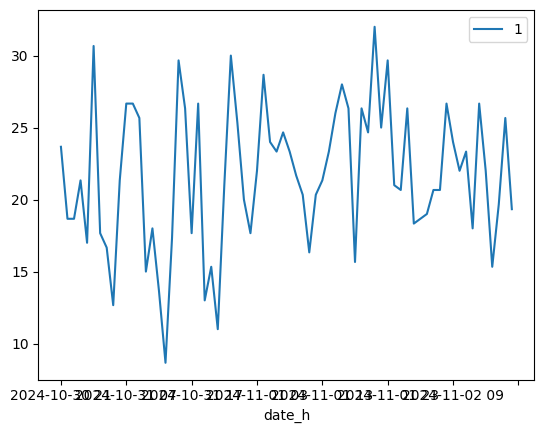

In [35]:
df_h.plot()

In [18]:
from sklearn import linear_model


In [19]:
reg = linear_model.LinearRegression()


In [49]:
import numpy as np


In [50]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [52]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [53]:
import matplotlib.pyplot as plt


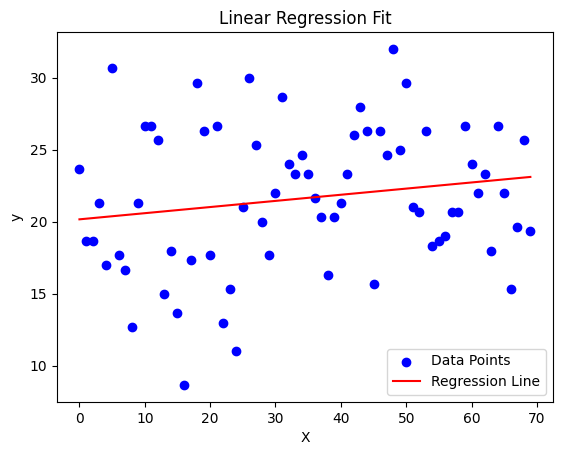

In [57]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()